### **House Price Prediction Dataset Description**  

This dataset contains **1,000 records** of house sales, capturing key attributes that influence house prices in various cities across the United States. Each row represents a unique house listing, detailing its physical characteristics, amenities, and location.  

#### **Columns in the Dataset**  
- **House_ID** – A unique identifier assigned to each house.  
- **Location** – The city where the house is located, such as New York, Los Angeles, San Francisco, and other major U.S. cities.  
- **Size_sqft** – The total size of the house in square feet.  
- **Bedrooms** – The number of bedrooms in the house.  
- **Bathrooms** – The number of bathrooms in the house.  
- **Price_USD** – The selling price of the house in U.S. dollars.  
- **Year_Built** – The year the house was constructed.  
- **Garage** – Indicates whether the house has a garage (Yes/No).  
- **Has_Pool** – Indicates whether the house includes a swimming pool (Yes/No).  
- **Nearby_Schools** – A rating of schools in the vicinity, represented as a numerical score.  

The dataset provides information useful for analyzing trends in real estate pricing based on factors like size, location, and available amenities.

In [2]:
#IMPORTING the necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [3]:
#LOADIND OF THE DATASET

df=pd.read_csv(r"E:\data analysis using python( jupytetr notebooks)\datasets\large_uncleaned_house_prices.csv")

pd.set_option('display.max_columns',10)
df.head()

,House_ID,Location,Size_sqft,Bedrooms,Bathrooms,Price_USD,Year_Built,Garage,Has_Pool,Nearby_Schools
0,1001,Seattle,1807.0,1.0,2,1711946,1900.0,No,Yes,6
1,1002,Chicago,4290.0,2.0,4,868223,1929.0,No,Yes,4
2,1003,Houston,1597.0,4.0,2,456007,2019.0,No,No,6
3,1004,Seattle,860.0,1.0,2,1022736,1938.0,Yes,Yes,4
4,1005,San Francisco,4556.0,3.0,1,1527989,1909.0,Yes,No,6


# EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(1000, 10)

In [5]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
df.columns

Index(['House_ID', 'Location', 'Size_sqft', 'Bedrooms', 'Bathrooms',
       'Price_USD', 'Year_Built', 'Garage', 'Has_Pool', 'Nearby_Schools'],
      dtype='object')

In [7]:
df.dtypes

House_ID            int64
Location           object
Size_sqft         float64
Bedrooms          float64
Bathrooms           int64
Price_USD          object
Year_Built        float64
Garage             object
Has_Pool           object
Nearby_Schools     object
dtype: object

In [8]:
df.nunique()

House_ID          1000
Location             8
Size_sqft          567
Bedrooms             5
Bathrooms            4
Price_USD          627
Year_Built         125
Garage               2
Has_Pool             2
Nearby_Schools       8
dtype: int64

In [9]:
df.count()

House_ID          1000
Location          1000
Size_sqft          999
Bedrooms           832
Bathrooms         1000
Price_USD          997
Year_Built         999
Garage            1000
Has_Pool          1000
Nearby_Schools    1000
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   House_ID        1000 non-null   int64  
 1   Location        1000 non-null   object 
 2   Size_sqft       999 non-null    float64
 3   Bedrooms        832 non-null    float64
 4   Bathrooms       1000 non-null   int64  
 5   Price_USD       997 non-null    object 
 6   Year_Built      999 non-null    float64
 7   Garage          1000 non-null   object 
 8   Has_Pool        1000 non-null   object 
 9   Nearby_Schools  1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [11]:
df.isnull().sum()

House_ID            0
Location            0
Size_sqft           1
Bedrooms          168
Bathrooms           0
Price_USD           3
Year_Built          1
Garage              0
Has_Pool            0
Nearby_Schools      0
dtype: int64

In [12]:
df.describe()

,House_ID,Size_sqft,Bedrooms,Bathrooms,Year_Built
count,1000.000000,999.000000,832.000000,1000.000000,999.000000
mean,1500.500000,3014.723724,3.026442,2.473000,1962.204204
std,288.819436,2827.106427,1.416517,1.139548,35.755044
min,1001.000000,801.000000,1.000000,1.000000,1900.000000
25%,1250.750000,1768.000000,2.000000,1.000000,1930.000000
50%,1500.500000,2884.000000,3.000000,2.000000,1960.000000
75%,1750.250000,3979.000000,4.000000,4.000000,1994.000000
max,2000.000000,60000.000000,5.000000,4.000000,2024.000000


# Data cleaning

### drop all duplicates

In [13]:
df.drop_duplicates()

,House_ID,Location,Size_sqft,Bedrooms,Bathrooms,Price_USD,Year_Built,Garage,Has_Pool,Nearby_Schools
0,1001,Seattle,1807.0,1.0,2,1711946,1900.0,No,Yes,6
1,1002,Chicago,4290.0,2.0,4,868223,1929.0,No,Yes,4
2,1003,Houston,1597.0,4.0,2,456007,2019.0,No,No,6
3,1004,Seattle,860.0,1.0,2,1022736,1938.0,Yes,Yes,4
4,1005,San Francisco,4556.0,3.0,1,1527989,1909.0,Yes,No,6
...,...,...,...,...,...,...,...,...,...,...
995,1996,Houston,3696.0,1.0,3,1660336,1924.0,No,Yes,6
996,1997,New York,1488.0,1.0,4,301604,1952.0,No,Yes,1
997,1998,Chicago,2848.0,2.0,1,1292503,1993.0,No,Yes,1
998,1999,Boston,1325.0,5.0,3,1146439,1918.0,Yes,No,3


### Replacing missing values with the mean of the column

In [14]:
#Convert Price_USD to Numeric Before Taking the Mean
df['Price_USD'] = pd.to_numeric(df['Price_USD'], errors='coerce')

df['Size_sqft']=df['Size_sqft'].fillna(df['Size_sqft'].mean())
df['Bedrooms']=df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Price_USD']=df['Price_USD'].fillna(df['Price_USD'].mean())
df['Year_Built']=df['Year_Built'].fillna(df['Year_Built'].mean())
df

,House_ID,Location,Size_sqft,Bedrooms,Bathrooms,Price_USD,Year_Built,Garage,Has_Pool,Nearby_Schools
0,1001,Seattle,1807.0,1.0,2,1711946.0,1900.0,No,Yes,6
1,1002,Chicago,4290.0,2.0,4,868223.0,1929.0,No,Yes,4
2,1003,Houston,1597.0,4.0,2,456007.0,2019.0,No,No,6
3,1004,Seattle,860.0,1.0,2,1022736.0,1938.0,Yes,Yes,4
4,1005,San Francisco,4556.0,3.0,1,1527989.0,1909.0,Yes,No,6
...,...,...,...,...,...,...,...,...,...,...
995,1996,Houston,3696.0,1.0,3,1660336.0,1924.0,No,Yes,6
996,1997,New York,1488.0,1.0,4,301604.0,1952.0,No,Yes,1
997,1998,Chicago,2848.0,2.0,1,1292503.0,1993.0,No,Yes,1
998,1999,Boston,1325.0,5.0,3,1146439.0,1918.0,Yes,No,3


In [15]:
df.isnull().sum()

House_ID          0
Location          0
Size_sqft         0
Bedrooms          0
Bathrooms         0
Price_USD         0
Year_Built        0
Garage            0
Has_Pool          0
Nearby_Schools    0
dtype: int64

### convert bedrooms and year_built from float into interger 

In [16]:
df['Bedrooms']= df['Bedrooms'].astype(int)
df['Year_Built']=df['Year_Built'].astype(int)
df['Size_sqft']=df['Size_sqft'].astype(int)
df.head()

,House_ID,Location,Size_sqft,Bedrooms,Bathrooms,Price_USD,Year_Built,Garage,Has_Pool,Nearby_Schools
0,1001,Seattle,1807,1,2,1711946.0,1900,No,Yes,6
1,1002,Chicago,4290,2,4,868223.0,1929,No,Yes,4
2,1003,Houston,1597,4,2,456007.0,2019,No,No,6
3,1004,Seattle,860,1,2,1022736.0,1938,Yes,Yes,4
4,1005,San Francisco,4556,3,1,1527989.0,1909,Yes,No,6


### using mapping to convert words into values in Nearby_Schools column

In [17]:
school_mapping={"One": 1,
                "Two": 2,
                "Three": 3,
                "Four": 4,
                "Five": 5,
                "Six": 6 }
df['Nearby_Schools']=df['Nearby_Schools'].replace(school_mapping)
df.head(10)

,House_ID,Location,Size_sqft,Bedrooms,Bathrooms,Price_USD,Year_Built,Garage,Has_Pool,Nearby_Schools
0,1001,Seattle,1807,1,2,1711946.0,1900,No,Yes,6
1,1002,Chicago,4290,2,4,868223.0,1929,No,Yes,4
2,1003,Houston,1597,4,2,456007.0,2019,No,No,6
3,1004,Seattle,860,1,2,1022736.0,1938,Yes,Yes,4
4,1005,San Francisco,4556,3,1,1527989.0,1909,Yes,No,6
5,1006,Boston,4326,4,3,1352137.0,1913,No,Yes,1
6,1007,Houston,2048,3,4,1847306.0,1927,Yes,No,4
7,1008,Houston,3435,3,2,1945759.0,1920,No,No,6
8,1009,Seattle,997,1,4,1151339.0,2021,No,No,6
9,1010,Los Angeles,3648,4,1,1946357.0,1910,No,No,3


# Predictive modelling

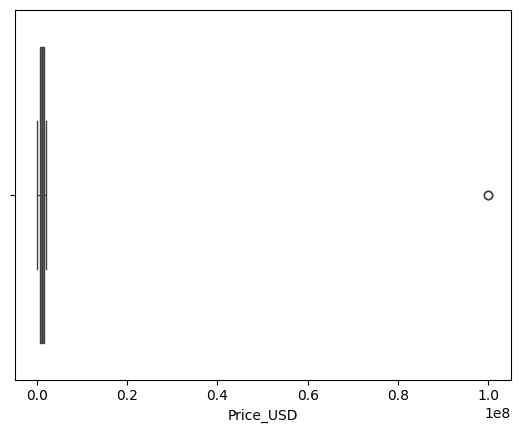

In [18]:
# check for outliers in pricing 
sns.boxplot(x=df['Price_USD'])
plt.show()

### converting object variables to numeric variables

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   House_ID        1000 non-null   int64  
 1   Location        1000 non-null   object 
 2   Size_sqft       1000 non-null   int64  
 3   Bedrooms        1000 non-null   int64  
 4   Bathrooms       1000 non-null   int64  
 5   Price_USD       1000 non-null   float64
 6   Year_Built      1000 non-null   int64  
 7   Garage          1000 non-null   object 
 8   Has_Pool        1000 non-null   object 
 9   Nearby_Schools  1000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 78.3+ KB
